<h1>
<center>CFRM 521, Spring 2020</center>
</h1>

<h1>
<center>[Please insert your name(s) here]</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Monday 18th May 2020, at 11:59pm**

* You may submitted this homework with one other classmate. If you are submitting in a group of two, only one of you must submit the homework. The other must make a comment on Canvas (where you would submit the homework) mentioning that they are submitting with another person. Also, please include both of your names in the homework submission.


* Late homework are allowed, **but a 10% penalty per day applies.** Example: submitting on Tuesday 00:01am results in 10% penalty, on Wednesday 00:01am results in 20% penalty, etc. Your last submission is considered for calculating the penalty.


*  Please use this Jupyter notebook as a template for your solutions. Your solution must be submitted as one Jupyter notebook. You are allowed to use code from the textbook, textbook website, or lecture notes. However, please go over the code you are using.

# 1. Exercise 10 of Chapter 8
## (a)
Load the MNIST dataset and take only the first 10,000 observations as `X` and `y`.  Use the nonlinear dimension reduction technique **t-SNE** to reduce this subset of MNIST dataset down to two dimensions. Measure how long it took to reduce dimension. This will be used in answering part (c). Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class. You should get a nice visualization of different classes. Which classes are easily identified and which ones can be hard to distinguish?

In [1]:
from sklearn.utils.random import sample_without_replacement
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from time import time
import warnings
warnings.filterwarnings('ignore')

X, y = fetch_openml('mnist_784', return_X_y=True)
X_t, y_t = X[:10000],y[:10000]
# dictionaries to store the result
X_embd = {}
dt = {}

start_time = time()
# use multiple threholding for training
X_embd['TSNE'] = TSNE(n_components=2, n_jobs = -1).fit_transform(X_t)
dt['TSNE'] = time()-start_time

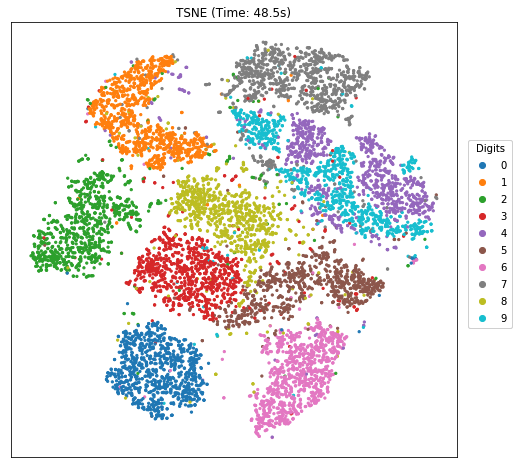

In [2]:
# plot result
def plot_scatter_2d(ax, X, y, name, s = 5):
    # scatter plot
    scatter = ax.scatter(X[:,0], X[:,1],s = s, c = y.astype(int), cmap = 'tab10')
    ax.set_title(f"{name} (Time: {dt[name]:.1f}s)")
    ax.set_xticks([])
    ax.set_yticks([])
    return scatter

fig = plt.figure(figsize = (8,8))
ax = fig.subplots()
scatter = plot_scatter_2d(ax, X_embd['TSNE'], y_t, 'TSNE', s = 5)
# add fig legent
lgd = fig.legend(*scatter.legend_elements(),
                    loc="right", title="Digits")
fig.add_artist(lgd)

### Answer

For parallel processing with 12 cores, it takes 47.3s. As shown Above,class 4 and 9 and part of 7 are hard to distinguished

## (b)
Obtain alternative visualizations as suggested in the corresponding Jupyter notebook for the solution of this exercise. You can write colored digits at the location of each instance and plot scaled-down versions of the digit images themselves. In the latter case, the visualization will be too cluttered if you draw the image for every observation. So, you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. Try to get at least one nice visualization with well-separated clusters of digits.

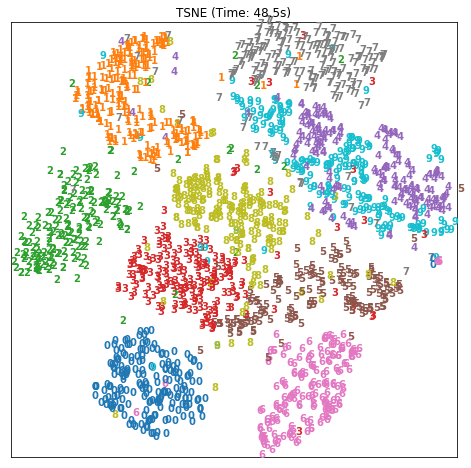

In [3]:
from sklearn.preprocessing import MinMaxScaler
def plot_digit_2d(ax, X, y, name, samples = None, s = 5):
    # taking subsample
    if samples:
        smps = sample_without_replacement(len(y),samples)
    else:
        smps = range(len(y))
        
    X_plot = MinMaxScaler().fit_transform(X[smps,:])
    y_plot = y[smps]
    
    for i in range(X_plot.shape[0]):
        ax.text(X_plot[i, 0], X_plot[i, 1], y_plot[i],
                color=plt.cm.tab10(int(y_plot[i]) / 10.),
                fontdict={'weight': 'bold', 'size': s})
    ax.set_title(f"{name} (Time: {dt[name]:.1f}s)")
    ax.set_xticks([])
    ax.set_yticks([])

fig = plt.figure(figsize = (8,8))
ax = fig.subplots()
plot_digit_2d(ax, X_embd['TSNE'], y_t, 'TSNE', samples = 2000, s = 10)

## (c)
Try using other dimensionality reduction algorithms. Specifically, try:

* Regular PCA (down to 2 dimensions).
* LLE to 2 dimensions.
* First PCA with explained variance ratio of 95%, then apply LLE to reduce to 2 dimensions.
* LDA to 2 dimensions.
* First PCA with explained variance ratio of 95%, then apply t-NSE to reduce to 2 dimensions.

For each algorithm, report how long it took the algorithm to reduce the dimension. Also, provide a 2D plot of the results, using one of the plots in part (a) or (b). Which method runs faster? Which one results in a better visualization? Include t-SNE in part (a) in your comparison.

In [4]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

start_time = time()
# use multiple threholding for training
X_embd['PCA'] = PCA(n_components=2, svd_solver = 'full').fit_transform(X_t)
dt['PCA'] = time()-start_time

start_time = time()
X_embd['LLE'] = LocallyLinearEmbedding(n_components=2, n_jobs = -1).fit_transform(X_t)
dt['LLE'] = time()-start_time

start_time = time()
X_temp = PCA(n_components=0.95, svd_solver = 'full').fit_transform(X_t)
X_embd['PCA+LLE'] = LocallyLinearEmbedding(n_components=2, n_jobs = -1).fit_transform(X_temp)
dt['PCA+LLE'] = time()-start_time

start_time = time()
X_embd['LDA'] = LinearDiscriminantAnalysis(n_components = 2).fit_transform(X_t,y_t)
dt['LDA'] = time()-start_time

start_time = time()
X_temp = PCA(n_components=0.95, svd_solver = 'full').fit_transform(X_t)
X_embd['PCA+TSNE'] = TSNE(n_components=2, n_jobs = -1).fit_transform(X_temp)
dt['PCA+TSNE'] = time()-start_time


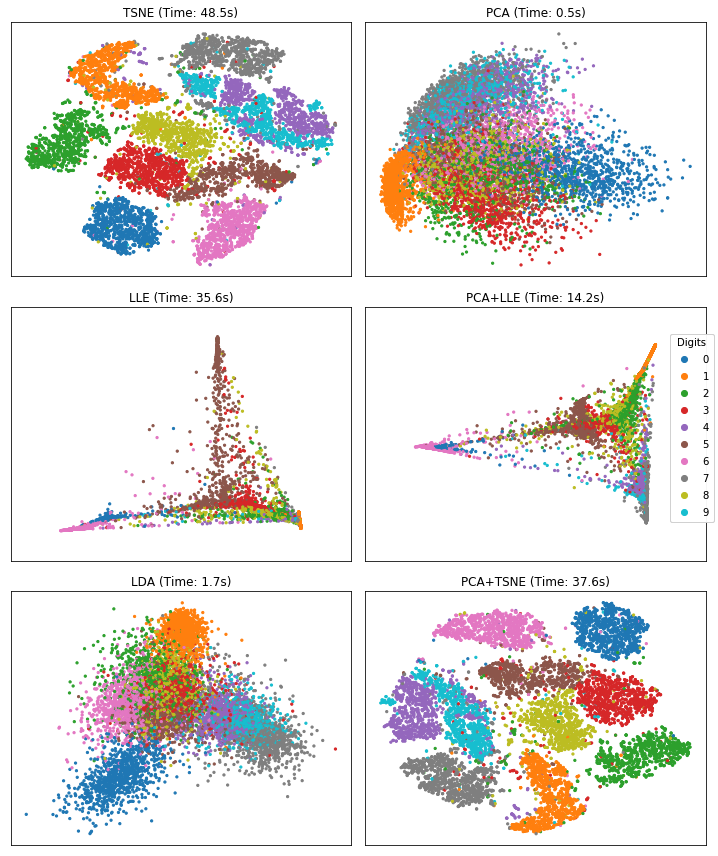

In [5]:
fig = plt.figure(figsize = (10,12))
ax = fig.subplots(3,2)
for n, name in enumerate(X_embd.keys()):
    scatter = plot_scatter_2d(ax[n // 2, n % 2], X_embd[name],y_t, name)
fig.tight_layout()
# add fig legent
lgd = fig.legend(*scatter.legend_elements(), 
                 loc="right", title="Digits")
fig.add_artist(lgd)

### Answer

t-SNE shows the best separation of clusters.

Although most of the linear transformation obtained the fastest result, the non-linearity separation space for each digit resultin that linear transformation method other than t-SNE is not good at separating the clusters.

# 2. 
## (a) Exercises 10 of Chapter 9 of the textbook.

The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is
flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual
task is to train a model that can predict which person is represented in each picture. Load the dataset using
the `sklearn.datasets.fetch_olivetti_faces()` function, then split it into a training set, a validation
set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small,
you probably want to use stratified sampling to ensure that there are the same number of images per person
in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters
(using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in
each cluster?

#### 1. Split training/validation and test dataset with stratify spliting

In [6]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data = fetch_olivetti_faces()
# train test split
X_train, X_test,img_train, img_test, y_train,y_test = train_test_split(data.data,
                                                                      data.images,
                                                                      data.target,
                                                                      stratify = data.target,
                                                                      test_size = 0.2)
# test validate split
X_train, X_val,img_train, img_val, y_train,y_val = train_test_split(X_train,
                                                                    img_train,
                                                                    y_train,
                                                                    stratify = y_train,
                                                                    test_size = 0.25)

#### 2. Clustering the images

To pick the best number of cluters, we check the point where the clustering reaches the max Silhoutte Scores. 

By iterating different clusters, we found that when number of clusters reaches around 120-150 (Fig 1). The Silhotte Score readches its maximum. Therefore, we choose k = 120 as our optimal cluster size.

Under k = 120, we plot a random cluster with size of image 4. We found that the inside one cluster, they shows very close in appearance.

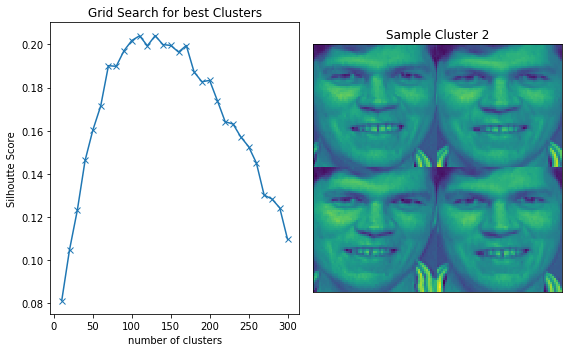

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X = data.data
scores = []
K = range(10,301,10)
for k in K:
    gm = KMeans(n_clusters=k,n_init = 10)
    y = gm.fit_predict(X)
    scores.append(silhouette_score(X, y))

# train on the best n_clusters
gm = KMeans(n_clusters=120,n_init = 50)
clst = gm.fit_predict(X)

# plot the sihoutte scores
fig =plt.figure(figsize = (8,5))
ax = fig.subplots(1,2)
ax[0].plot(K, scores, 'x-')
ax[0].set_title('Grid Search for best Clusters')
ax[0].set_xlabel('number of clusters')
ax[0].set_ylabel('Silhoutte Score')

# plot a class with length 4
for id_ in range(120):
    n_imgs = len(data.images[clst == id_])
    if n_imgs == 4:
        break
        
images = [[data.images[clst == id_][0], data.images[clst == id_][1]],
          [data.images[clst == id_][2], data.images[clst == id_][3]]]
ax[1].imshow(np.bmat(images))
ax[1].set_title(f'Sample Cluster {id_}')
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.tight_layout()

## (b) Exercises 11 of Chapter 9 of the textbook.

Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each
picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and
train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the
best performance: what performance can you reach? What if you append the features from the reduced set
to the original features (again, searching for the best number of clusters)?

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def combine_training(data, model, n_clusters = 120, output = 'raw'): 
    X_train = data['X_train']
    y_train = data['y_train']
    X_val = data['X_val']
    y_val = data['y_val']
    X_test = data['X_test']
    y_test = data['y_test']
    
    if output != 'raw':
        km = KMeans(n_clusters=n_clusters)    
        # transform the input data
        if output == 'total':
            X_train = np.hstack([X_train, km.fit_transform(X_train)])
            X_val = np.hstack([X_val, km.transform(X_val)])
            X_test = np.hstack([X_test, km.transform(X_test)])
        elif output == 'reduced':
            X_train = km.fit_transform(X_train)
            X_val = km.transform(X_val)
            X_test = km.transform(X_test)
    # train the supervise mode
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    # score
    s_train = accuracy_score(y_train, y_pred_train)
    s_val = accuracy_score(y_val, y_pred_val)
    s_test =accuracy_score(y_test, y_pred_test)
    return s_train,s_val, s_test

data = {'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test}

mdl = SVC()

# raw classifier
train_acc_raw, val_acc_raw, test_acc_raw = combine_training(data,mdl, output = 'raw')

K = range(10,231,10)

# training on full dataset
train_acc_full, val_acc_full, test_acc_full = [], [],[]
for k in K:
    score_train, score_val,score_test = combine_training(data, mdl, n_clusters = k, output = 'total')
    train_acc_full.append(score_train)
    val_acc_full.append(score_val)
    test_acc_full.append(score_test)

# training on reduced dataset
train_acc_red, val_acc_red, test_acc_red = [], [],[]
for k in K:
    score_train, score_val,score_test = combine_training(data, mdl, n_clusters = k, output = 'reduced')
    train_acc_red.append(score_train)
    val_acc_red.append(score_val)
    test_acc_red.append(score_test)

#### Answer

In this problem, we emplyeed SVM classifier as our supervised classfier. KMean transforms the orginal data to new cluster space which represented for the distance to each class. Then accuracy score of both training and validation are shown below. 

1. For pure classifier onoriginal feature, the accuracy is 0.88 
2. For classifier on reduced dataset, the accuracy is increased by the size of cluster. 
3. For classifier on original feature + cluster space, the accuracy is decreased by the size of cluster. 

We choose $k= 150$ for reduced subset and $k=10$ on extened features. The final accuracy is: 0.96 (Pure SVM), 0.59 (Reduced subset), 0.78 (Extended Features)

The existence of clustering space does not benefit too much for the classfication which means the images are not showing perfectly clustering behavior in higher dimension.

Test Accuracy on Optimal Parameters
Pure classifier: 0.91
Reduced Subset(k=150): 0.69
Extened Features(k=10):0.70


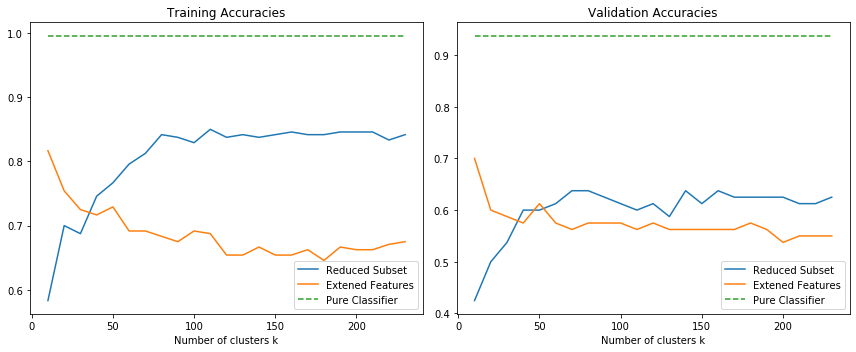

In [9]:
print('Test Accuracy on Optimal Parameters')
print(f'Pure classifier: {test_acc_raw:.2f}')
print(f'Reduced Subset(k=150): {test_acc_red[14]:.2f}')
print(f'Extened Features(k=10):{test_acc_full[0]:.2f}')

fig = plt.figure(figsize = (12,5))
ax = fig.subplots(1,2)
ax[0].plot(K, train_acc_red, label = 'Reduced Subset' )
ax[0].plot(K, train_acc_full, label = 'Extened Features')
ax[0].plot(K, [train_acc_raw]*len(K),'--',label = 'Pure Classifier')
ax[0].set_title('Training Accuracies')
ax[0].set_xlabel('Number of clusters k')
ax[0].legend()
ax[1].plot(K, val_acc_red, label = 'Reduced Subset' )
ax[1].plot(K, val_acc_full, label = 'Extened Features')
ax[1].plot(K, [val_acc_raw]*len(K),'--',label = 'Pure Classifier')
ax[1].set_title('Validation Accuracies')
ax[1].set_xlabel('Number of clusters k')
ax[1].legend()
fig.tight_layout()

# 3. Finding regimes in a time series

## (a)
You can obtain daily values of NASDAQ Composite Index going back to Feb 1971 from [FRED](https://fred.stlouisfed.org/series/NASDAQCOM#). Calculate daily returns of this index and obtain daily estimates of its volatility. You are free to choose your preferred method of estimation. For example, you can simply use the average of last 25 daily returns, or you can fit a GARCH(1,1) model. In the latter case, you may find [rpy2](https://rpy2.github.io/) package useful. 

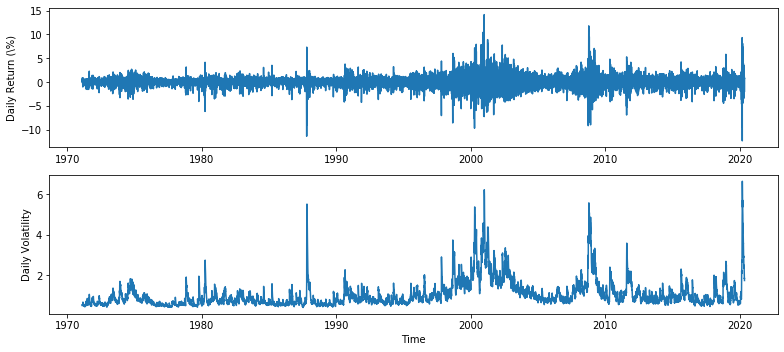

In [10]:
import pandas as pd
from arch import arch_model
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('NASDAQCOM.csv',parse_dates = ['DATE'])
df[df['NASDAQCOM'] == '.'] = np.nan
df['NASDAQCOM'] = df['NASDAQCOM'].fillna(method='ffill').astype(float)
df['return'] = 100*df['NASDAQCOM'].pct_change()
df = df.dropna(how = 'any')

# use GARCH(1,1) to model volatility
garch11 = arch_model(df['return'], p=1, q=1)
res = garch11.fit(disp = 'off')
df['volatility'] = res.conditional_volatility

fig = plt.figure(figsize = (11,5))
ax = fig.subplots(2,1)
ax[0].plot(df['DATE'],df['return'])
ax[0].set_ylabel('Daily Return (\%)')
ax[1].plot(df['DATE'],df['volatility'])
ax[1].set_ylabel('Daily Volatility')
ax[1].set_xlabel('Time')
fig.tight_layout()

## (b)
Split your volatility estimates into a training set (before Jan 2005) and a test set (Jan 2005 and after). Leave aside the test set, we will get back to it in part (c). Now, ignore the time aspect of your training set and treat it as a 1-dimensional dataset with the only feature being the daily volatility. Use k-Means to divide your training set into a number of **regimes**. A regime is an interval for volatility. Use the three methods discussed in lecture 11 (namely, 1) inertia, 2) silhouette scores, and 3) silhouette diagram) to find the number of regimes. If you get nonsensical result (e.g. 1 cluster or 10 clusters), use 3 clusters for the remainder of this exercise. Report the centroid of your regimes. Also, plot a time series showing the transition from one centroid to another through time (for the training set).

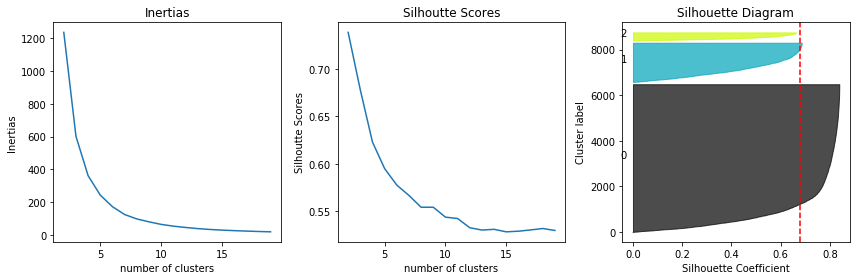

In [11]:
from sklearn.metrics import silhouette_samples

df_train = df[df['DATE'] < pd.Timestamp('2005-01-01')]

inertias = []
s_scores = []
K = range(2, 20)
for k in K:
    X = df_train['volatility'].values.reshape(-1,1)
    km = KMeans(n_clusters=k)  
    km.fit(X)
    inertias.append(km.inertia_)
    s_scores.append(silhouette_score(X, km.labels_))

fig = plt.figure(figsize = (12,4))
ax = fig.subplots(1,3)
ax[0].plot(K, inertias)
ax[0].set_xlabel('number of clusters')
ax[0].set_ylabel('Inertias')
ax[0].set_title('Inertias')
ax[1].plot(K, s_scores)
ax[1].set_xlabel('number of clusters')
ax[1].set_ylabel('Silhoutte Scores')
ax[1].set_title('Silhoutte Scores')

# training for k = 3
km = KMeans(n_clusters=3,init = np.array([0,2,4]).reshape(-1,1),n_init = 1) 
km.fit(X)
s_vals = silhouette_samples(X,km.labels_)
y_lower = 0
for i in range(3):
    s_vals_i = s_vals[km.labels_ == i]
    s_vals_i.sort()
    size_cluster_i = s_vals_i.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax[2].fill_betweenx(np.arange(y_lower, y_upper),0, s_vals_i,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax[2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 100
ax[2].axvline(x=silhouette_score(X, km.labels_), color="red", linestyle="--")
ax[2].set_title("Silhouette Diagram")
ax[2].set_xlabel("Silhouette Coefficient")
ax[2].set_ylabel("Cluster label")
fig.tight_layout()

From the plot above, both intertias and sihoutte scores do not gives us a clear optimal choice of cluster numbers because the cluster size are quite skewed. Therefore, we choose $k = 3$ as instructed for the later analysis. The center for the 3 regimes are: 0.74, 1.61 and 3.30


Regime Centers: [0.74099009 1.61068033 3.29580889]


Text(0, 0.5, 'Volatility')

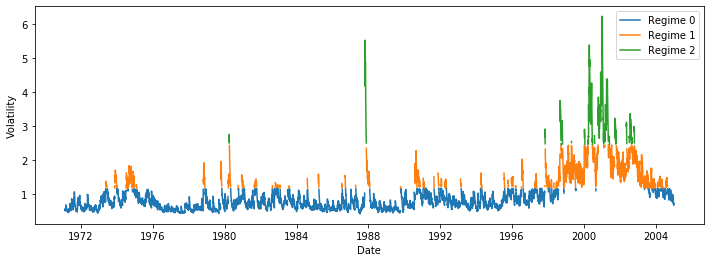

In [12]:
print(f'Regime Centers: {km.cluster_centers_.flatten()}')
df_train.loc[:,'regime'] = km.labels_.flatten()

fig = plt.figure(figsize = (12,4))
ax = fig.subplots()
for i in range(3):
    y_plot = df_train['volatility'].to_numpy(copy = True)
    y_plot[df_train['regime'] != i] = np.nan
    ax.plot(df_train['DATE'], y_plot, label = f'Regime {i}')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')

$\newcommand\1{\mathbf{1}}$
$\newcommand\0{\mathbf{0}}$
$\newcommand\Nc{\mathcal{N}}$
$\newcommand\Rb{\mathbb{R}}$
$\newcommand\Pb{\mathbb{P}}$
$\newcommand\Eb{\mathbb{E}}$
$\newcommand\tht{\theta}$
$\newcommand\sig{\sigma}$
$\newcommand\al{\alpha}$
$\newcommand\lam{\lambda}$
$\newcommand\gam{\gamma}$
$\newcommand\eps{\varepsilon}$
$\newcommand\av{\mathbf{a}}$
$\newcommand\bv{\mathbf{b}}$
$\newcommand\cv{\mathbf{c}}$
$\newcommand\ellv{\mathbf{\ell}}$
$\newcommand\wv{\mathbf{w}}$
$\newcommand\Iv{\mathbf{I}}$
$\newcommand\xv{\mathbf{x}}$
$\newcommand\yv{\mathbf{y}}$
$\newcommand\zv{\mathbf{z}}$
$\newcommand\Av{\textbf{A}}$
$\newcommand\Dv{\textbf{D}}$
$\newcommand\Xv{\textbf{X}}$
$\newcommand\Yv{\textbf{Y}}$
$\newcommand\yb{\overline{y}}$
$\newcommand\thtv{\boldsymbol\tht}$
$\newcommand\lamv{\boldsymbol\lambda}$
$\newcommand\thtvh{\widehat{\thtv}}$
$\newcommand\epsh{\widehat{\eps}}$
$\newcommand\phat{\widehat{p}}$
$\newcommand\yh{\widehat{y}}$
$\newcommand\Yh{\widehat{Y}}$
$\newcommand\wvh{\widehat{\wv}}$
$\newcommand\bh{\widehat{b}}$
## (c)

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next day volatility regime depends only on today's vol regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \Pb(X_{t+1}=j|X_t=i)$ in which $X_t$ is the vol regime at day $t$. Using the time series of regimes (in the training set) that you find in part (c), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\Pb(X_{t+1}=j \text{ and } X_t=i)}{\Pb(X_t=i)}\approx \frac{\text{number of transition from regime i to j}}{\text{number of transition from regime i}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do **NOT** retrain your k-Means clusterer, simply used it to predict the regimes of the test set. Then, repeat the estimation method above on the resulting time series of regimes. Comment on the performance of your regime switching models. Do the transition probabilities changes between the training and test sets? Explain.

In [13]:
from scipy.stats import chisquare
from scipy.stats import norm
df_train.loc[:,'next_regime'] = df_train['regime'].shift()
df_train = df_train.dropna(how = 'any')
p_train = pd.crosstab(index = df_train['regime'],columns = df_train['next_regime'])
train_sum = p_train.sum(axis = 1)
p_train = p_train.divide(train_sum,axis = 0)

df_test = df[df['DATE'] >= pd.Timestamp('2005-01-01')]
df_test = df_test.dropna(how = 'any')
df_test.loc[:,'regime'] = km.predict(df_test['volatility'].values.reshape(-1,1))
df_test.loc[:,'next_regime'] = df_test['regime'].shift()
p_test = pd.crosstab(index = df_test['regime'],columns = df_test['next_regime'])
test_sum = p_test.sum(axis = 1)
p_test = p_test.divide(test_sum,axis = 0)
print('Transition Probability: Train data')
print(p_train)
print('Transition Probability: Test data')
print(p_test)
# z test scores
z_scores = (p_train - p_test)/np.sqrt(p_train*(1-p_train).divide(train_sum,axis = 0)+
                                      p_test*(1-p_test).divide(test_sum,axis = 0)+1e-10)
p_val = norm.sf(abs(z_scores))*2
print('Difference p-value of proportion Z-test')
print(pd.DataFrame(data = p_val, columns = p_test.columns, index = p_test.index))

Transition Probability: Train data
next_regime       0.0       1.0       2.0
regime                                   
0            0.982876  0.017124  0.000000
1            0.064460  0.916957  0.018583
2            0.000000  0.090395  0.909605
Transition Probability: Test data
next_regime       0.0       1.0       2.0
regime                                   
0            0.966280  0.033720  0.000000
1            0.088264  0.897187  0.014549
2            0.000000  0.088757  0.911243
Difference p-value of proportion Z-test
next_regime       0.0       1.0       2.0
regime                                   
0            0.000016  0.000016  1.000000
1            0.025185  0.087296  0.415045
2            1.000000  0.951009  0.951009


### Answer:

As shown above, the transition matrix for both training and testing process has slightly difference. To test whether the probability are changed, we perform a element-wise two-sample z-test on proportion on these two processes. We found that the transition probability from regime 0 to regime 1 is significant different after 2005 which means the market is more stable than the period of training set. For other transitions, it do not shows significant differences.

# 4. A Regression MLP
Load, split, and scale the California housing dataset from Scikit-Learn (the original one, not the modified one that we introduced in lecture 1), as follows

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## (a)
Use `tensorflow.keras` to train a regression MLP with one hidden layer of 30 ReLU neurons. Use (`X_train`,`y_train`) as the training set. Report the mean squared error on (`X_valid`, `y_valid`) during training. Train for 30 epochs. To achieve this, use the following form of the `.fit()` method of the Keras model:

In [15]:
#.fit(X_train, y_train, epochs=30,
#     verbose=1,
#     validation_data=(X_valid, y_valid))

**Hint:** You need a single neuron output layer without an activation function. Use `loss="mean_squared_error"` when compiling the Keras model.

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(30, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)
# define loss
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mse'])
# train model
history = model.fit(X_train, y_train, epochs=30,
                 verbose=1,
                 validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 0s 999us/step - loss: 1.8054 - mse: 1.8054 - val_loss: 0.9569 - val_mse: 0.9569
Epoch 2/30
363/363 [==============================] - 0s 931us/step - loss: 0.5248 - mse: 0.5248 - val_loss: 1.5943 - val_mse: 1.5943
Epoch 3/30
363/363 [==============================] - 0s 965us/step - loss: 0.4510 - mse: 0.4510 - val_loss: 3.4995 - val_mse: 3.4995
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 4.2584 - val_mse: 4.2584
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 3.8995 - val_mse: 3.8995
Epoch 6/30
363/363 [==============================] - 0s 884us/step - loss: 0.4143 - mse: 0.4143 - val_loss: 4.0043 - val_mse: 4.0043
Epoch 7/30
363/363 [==============================] - 0s 888us/step - loss: 0.4053 - mse: 0.4053 - val_loss: 3.8875 - val_mse: 3.8875
Epoch 8/30
363/363 [==============================] - 0s 847us/ste

## (b)
Plot the learning curves from part (a). Does it look like that the model is overfitting?

**Hint:** After training, the `.history` variable of the trained model has the training and validation metrics (which is the mean squared error if you follow the hint in part (a)). 


### Answer:

The learning curve is shown below. The model is overfitted because the difference of MSE between validation set and training set are huge and the validation loss didnot converged.

Text(0, 0.5, 'Mean Squared Error')

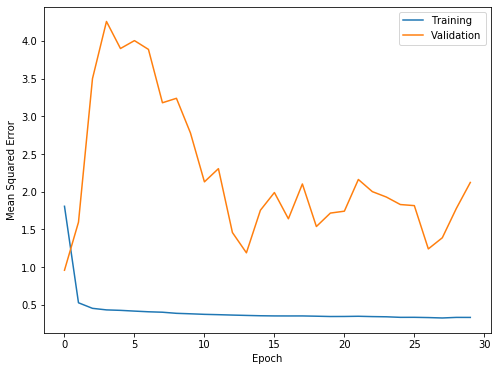

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

fig = plt.figure(figsize = (8,6))
ax = fig.subplots()
ax.plot(hist['epoch'],hist['mse'],label = 'Training')
ax.plot(hist['epoch'],hist['val_mse'],label = 'Validation')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')

# 5. optional exercise
You do not need to submit the solution of this exercise (there is nothing to submit, actually). However, I strongly recommend that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** modify the network architecture to have just one hidden layer with three neurons and ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on top left. Notice that the training time and the shape of the decision borders vary a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random, I saw this twice in the first 30 runs).

## (d)

**Not enough neurons:** next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.